# CNN evaluation function for chess positions from the lichess puzzle database
The dataset that I use is a CSV modified from the original 3.9M record lichess puzzle database. I've run about 100,000 positions through stockfish and got the evaluation (depth 15) for each in a separate column:

lichess_db_puzzle_with_stockfish_eval.csv -> https://drive.google.com/file/d/1_-fEezSfi56E_9Nlck8M_IgqiG1wuap_/view?usp=sharing

Here is also 500k puzzles from the database, no stockfish evaluation but still some modifications from the original file:

lichess_db_puzzle_500_modified.csv -> https://drive.google.com/file/d/1TY_BjyoZa8EdOaADaXvTnIJ4F5lkWcuI/view?usp=sharing

If you want all 3.9M puzzles, let me know and I will upload, but it's 700MB and I have limited Google Drive space.

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [3]:
raw_dataset = pd.read_csv("lichess_db_puzzle_with_stockfish_eval.csv")
raw_dataset = raw_dataset.dropna(subset=['Evaluation'])
raw_dataset.head()

,PuzzleId,FEN,BestMove,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags,Evaluation
0,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2b1/PqP3PP/7K w - -...,e6e7,1917,76,94,6044,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#47,NaN,613.0
1,0000D,5rk1/1p3ppp/pq1Q1b2/8/8/1P3N2/P4PPP/3R2K1 b - ...,f8d8,1485,74,96,25966,advantage endgame short,https://lichess.org/F8M8OS71#52,NaN,-414.0
2,0008Q,8/5R2/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 b - - 1 64,f5e5,1420,74,90,541,advantage endgame rookEndgame short,https://lichess.org/MQSyb3KW#126,NaN,-228.0
3,0009B,r2qr1k1/b1p2ppp/p5n1/P1p1p3/4P1n1/B2P2Pb/3NBP1...,e2g4,1123,74,87,567,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#31,Kings_Pawn_Game Kings_Pawn_Game_Leonardis_Vari...,271.0
4,000Vc,8/8/4k1p1/2KpP2P/5P2/8/8/8 b - - 0 53,g6h5,1556,81,73,91,crushing endgame long pawnEndgame,https://lichess.org/l6AejDMO#104,NaN,-514.0


In [4]:
from game import *

def convert_to_cnn_representation(fen: str):
    game = Game(fen=fen)
    return np.array(game.to_cnn_representation(), dtype=np.float32)

raw_dataset['CNN_representations'] = raw_dataset['FEN'].apply(convert_to_cnn_representation).tolist()

In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Assuming raw_dataset is your DataFrame
# raw_dataset = pd.DataFrame({...})

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
raw_dataset['Evaluation_MinMax'] = min_max_scaler.fit_transform(raw_dataset[['Evaluation']])

# Standardization
standard_scaler = StandardScaler()
raw_dataset['Evaluation_Standardized'] = standard_scaler.fit_transform(raw_dataset[['Evaluation']])

# Display the DataFrame with the normalized columns
raw_dataset.head()

,PuzzleId,FEN,BestMove,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags,Evaluation,CNN_representations,Evaluation_MinMax,Evaluation_Standardized
0,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2b1/PqP3PP/7K w - -...,e6e7,1917,76,94,6044,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#47,NaN,613.0,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1...",0.576025,1.370898
1,0000D,5rk1/1p3ppp/pq1Q1b2/8/8/1P3N2/P4PPP/3R2K1 b - ...,f8d8,1485,74,96,25966,advantage endgame short,https://lichess.org/F8M8OS71#52,NaN,-414.0,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1...",0.438927,-0.970624
2,0008Q,8/5R2/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 b - - 1 64,f5e5,1420,74,90,541,advantage endgame rookEndgame short,https://lichess.org/MQSyb3KW#126,NaN,-228.0,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0...",0.463757,-0.546550
3,0009B,r2qr1k1/b1p2ppp/p5n1/P1p1p3/4P1n1/B2P2Pb/3NBP1...,e2g4,1123,74,87,567,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#31,Kings_Pawn_Game Kings_Pawn_Game_Leonardis_Vari...,271.0,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0...",0.530370,0.591151
4,000Vc,8/8/4k1p1/2KpP2P/5P2/8/8/8 b - - 0 53,g6h5,1556,81,73,91,crushing endgame long pawnEndgame,https://lichess.org/l6AejDMO#104,NaN,-514.0,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0...",0.425577,-1.198620


In [8]:
raw_dataset.shape

(94534, 14)

In [9]:
from sklearn.model_selection import train_test_split

BATCH_SIZE = 2048
X_train_and_val, X_test = train_test_split(raw_dataset, test_size=0.20)

X_train, X_val = train_test_split(X_train_and_val, test_size=0.20)

train_ds = tf.data.Dataset.from_tensor_slices((
    X_train['CNN_representations'].values.tolist(),
    X_train['Evaluation_Standardized'].values)).batch(BATCH_SIZE)

val_ds = tf.data.Dataset.from_tensor_slices((
    X_val['CNN_representations'].values.tolist(),
    X_val['Evaluation_Standardized'].values)).batch(BATCH_SIZE)

test_ds = tf.data.Dataset.from_tensor_slices((
    X_test['CNN_representations'].values.tolist(),
    X_test['Evaluation_Standardized'].values)).batch(BATCH_SIZE)


In [10]:
for data_batch, label_batch in train_ds.take(1):
  for i in range(3):
    board_shape = data_batch.numpy()[i].shape
    print(f'Board shape: {board_shape}')
    label = label_batch.numpy()[i]
    print(f'Label : {label} ')

Board shape: (14, 8, 8)
Label : 0.3608748089095868 
Board shape: (14, 8, 8)
Label : -1.018502847091901 
Board shape: (14, 8, 8)
Label : -0.4325523386747401 


In [17]:
def build_model():
    # Image Processing
    image_input = tf.keras.layers.Input(shape=(14, 8, 8), dtype=tf.float32)
    x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='conv_layer_1')(image_input)
    x = tf.keras.layers.MaxPooling2D((2, 2), name='pooling_1')(x)
    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='conv_layer_2')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2), name='pooling_2')(x)
    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='conv_layer_3')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2), name='pooling_3')(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)

    # Output layer
    output = tf.keras.layers.Dense(1, name='classifier')(x)

    return tf.keras.Model(inputs=[image_input], outputs=output)

# Example usage
model = build_model()

In [31]:
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [20]:
from tensorflow.keras.callbacks import EarlyStopping

# Compile the model for regression
model.compile(optimizer='adam',
              loss='mean_squared_error',  # or 'mean_absolute_error'
              metrics=['mean_squared_error', 'mean_absolute_error'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 14, 8, 8)]        0         
                                                                 
 conv_layer_1 (Conv2D)       (None, 14, 8, 32)         2336      
                                                                 
 pooling_1 (MaxPooling2D)    (None, 7, 4, 32)          0         
                                                                 
 conv_layer_2 (Conv2D)       (None, 7, 4, 64)          18496     
                                                                 
 pooling_2 (MaxPooling2D)    (None, 3, 2, 64)          0         
                                                                 
 conv_layer_3 (Conv2D)       (None, 3, 2, 128)         73856     
                                                                 
 pooling_3 (MaxPooling2D)    (None, 1, 1, 128)         0   

In [22]:
history = model.fit(train_ds, validation_data=val_ds, epochs=50, callbacks=[early_stopping])

Epoch 1/50


30/30 [==============================] - 1s 33ms/step - loss: 0.1293 - mean_squared_error: 0.1293 - mean_absolute_error: 0.2754 - val_loss: 0.3077 - val_mean_squared_error: 0.3077 - val_mean_absolute_error: 0.3300
Epoch 2/50
30/30 [==============================] - 1s 31ms/step - loss: 0.1148 - mean_squared_error: 0.1148 - mean_absolute_error: 0.2624 - val_loss: 0.2991 - val_mean_squared_error: 0.2991 - val_mean_absolute_error: 0.3275
Epoch 3/50
30/30 [==============================] - 1s 32ms/step - loss: 0.1150 - mean_squared_error: 0.1150 - mean_absolute_error: 0.2634 - val_loss: 0.3082 - val_mean_squared_error: 0.3082 - val_mean_absolute_error: 0.3305
Epoch 4/50
30/30 [==============================] - 1s 31ms/step - loss: 0.1243 - mean_squared_error: 0.1243 - mean_absolute_error: 0.2729 - val_loss: 0.3124 - val_mean_squared_error: 0.3124 - val_mean_absolute_error: 0.3354
Epoch 5/50
30/30 [==============================] - 1s 33ms/step - loss: 0.1238 - mean_squared_error: 0.1238 - 

In [27]:
model.evaluate(test_ds)

10/10 [==============================] - 0s 11ms/step - loss: 0.3021 - mean_squared_error: 0.3021 - mean_absolute_error: 0.3273


[0.3020622432231903, 0.3020622432231903, 0.3272637128829956]

dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_error'])


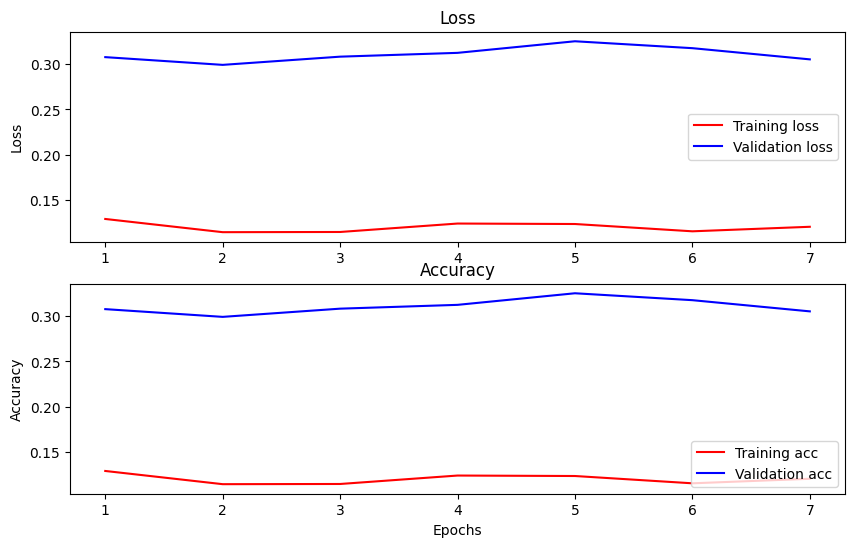

In [25]:
import matplotlib.pyplot as plt

history_dict = history.history
print(history_dict.keys())

acc = history_dict['mean_squared_error']
val_acc = history_dict['val_mean_squared_error']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Loss')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [45]:
print("Examples: ")

winning_for_white = np.array(Game("1r3k1r/pNqnppb1/6pn/2p3Np/7P/2P2Q2/PP3PP1/R1B1K2R w KQ - 2 15").to_cnn_representation(), dtype=np.float32)
winning_for_black = np.array(Game("5rk1/R4pp1/1p5p/3Q4/1PPp2q1/3P2P1/5P2/4K3 b - - 0 34").to_cnn_representation(), dtype=np.float32)

winning_for_white = np.expand_dims(winning_for_white, axis=0)
winning_for_black = np.expand_dims(winning_for_black, axis=0)

print("In a game winning for white:", model(winning_for_white))
print("In a game winning for black:", model(winning_for_black))

Examples: 
In a game winning for white: tf.Tensor([[0.9449743]], shape=(1, 1), dtype=float32)
In a game winning for black: tf.Tensor([[-0.66710186]], shape=(1, 1), dtype=float32)


In [44]:
model.save('./eval_cnn', include_optimizer=False)

INFO:tensorflow:Assets written to: ./eval_cnn\assets


INFO:tensorflow:Assets written to: ./eval_cnn\assets
